In [20]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [40]:
ticker = "^spx"
data = yf.download(ticker, start = "2017-01-01", end="2024-06-01")

[*********************100%%**********************]  1 of 1 completed


In [41]:
data["Close"]

Date
2017-01-03    2257.830078
2017-01-04    2270.750000
2017-01-05    2269.000000
2017-01-06    2276.979980
2017-01-09    2268.899902
                 ...     
2024-05-24    5304.720215
2024-05-28    5306.040039
2024-05-29    5266.950195
2024-05-30    5235.479980
2024-05-31    5277.509766
Name: Close, Length: 1865, dtype: float64

In [ ]:
여기 2017년 1월 1일부터 2024년 6월 1일까지 S&P500 지수에 영향을 준 15가지 주요 사건 목록입니다:

1. "2017-01-20" : "도널드 트럼프 대통령 취임"
2. "2017-12-22" : "미국 세제개혁법 통과"
3. "2018-02-05" : "다우지수 단일일 최대 하락"
4. "2018-10-10" : "미국 금리 인상 우려로 인한 주식시장 급락"
5. "2019-01-25" : "미국-중국 무역전쟁 부분적 합의"
6. "2019-12-12" : "미국-중국 무역 1단계 합의 서명"
7. "2020-03-16" : "COVID-19 팬데믹으로 인한 주식시장 붕괴"
8. "2020-03-23" : "미 연준의 무제한 양적 완화 발표"
9. "2020-11-09" : "화이자 COVID-19 백신 발표"
10. "2021-01-06" : "미국 국회의사당 폭동"
11. "2021-01-20" : "조 바이든 대통령 취임"
12. "2021-11-26" : "오미크론 변이 발견"
13. "2022-03-16" : "미 연준 금리 인상"
14. "2022-11-10" : "10월 소비자 물가 지수(CPI) 예상보다 낮게 발표"
15. "2023-03-10" : "실리콘밸리은행(SVB) 붕괴"

이 사건들은 S&P500 지수에 중요한 영향을 미친 주요 경제적 및 정치적 사건들입니다.

# 실습
- start = "2017-01-01", end="2024-06-01" 까지의 S&P 500 지수에 영향을 준 내역 입니다.
- 해당 내역과 S&P 지수를 결합하여 그래프로 나타내고 annotation 을 달아 보세요


1. "2017-01-20": "Donald Trump Inaugurated as President"
2. "2017-12-22": "U.S. Tax Cuts and Jobs Act Passed"
3. "2018-02-05": "Dow Jones Records Largest Single-Day Point Drop"
4. "2018-10-10": "Stock Market Plunge Due to Interest Rate Hike Concerns"
5. "2019-01-25": "Partial Trade Agreement Between U.S. and China"
6. "2019-12-12": "Phase One Trade Deal Between U.S. and China Signed"
7. "2020-03-16": "Stock Market Crash Due to COVID-19 Pandemic"
8. "2020-03-23": "Federal Reserve Announces Unlimited Quantitative Easing"
9. "2020-11-09": "Pfizer Announces COVID-19 Vaccine"
10. "2021-01-06": "U.S. Capitol Riot"
11. "2021-01-20": "Joe Biden Inaugurated as President"
12. "2021-11-26": "Omicron Variant Discovered"
13. "2022-03-16": "Federal Reserve Raises Interest Rates"
14. "2022-11-10": "October Consumer Price Index (CPI) Lower Than Expected"
15. "2023-03-10": "Collapse of Silicon Valley Bank (SVB)"

In [42]:
data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-01-03,2251.570068,2263.879883,2245.129883,2257.830078,2257.830078,3773010000
2017-01-04,2261.600098,2272.820068,2261.600098,2270.750000,2270.750000,3768890000
2017-01-05,2268.179932,2271.500000,2260.449951,2269.000000,2269.000000,3785080000
2017-01-06,2271.139893,2282.100098,2264.060059,2276.979980,2276.979980,3342080000
2017-01-09,2273.590088,2275.489990,2268.899902,2268.899902,2268.899902,3219730000


In [9]:
data.index.dtype

dtype('<M8[ns]')

<Axes: xlabel='Date'>

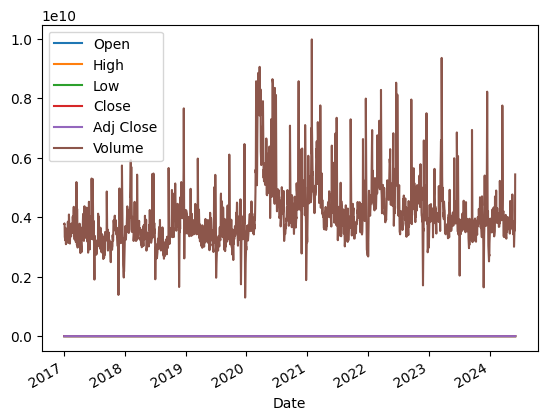

In [43]:
data.plot()

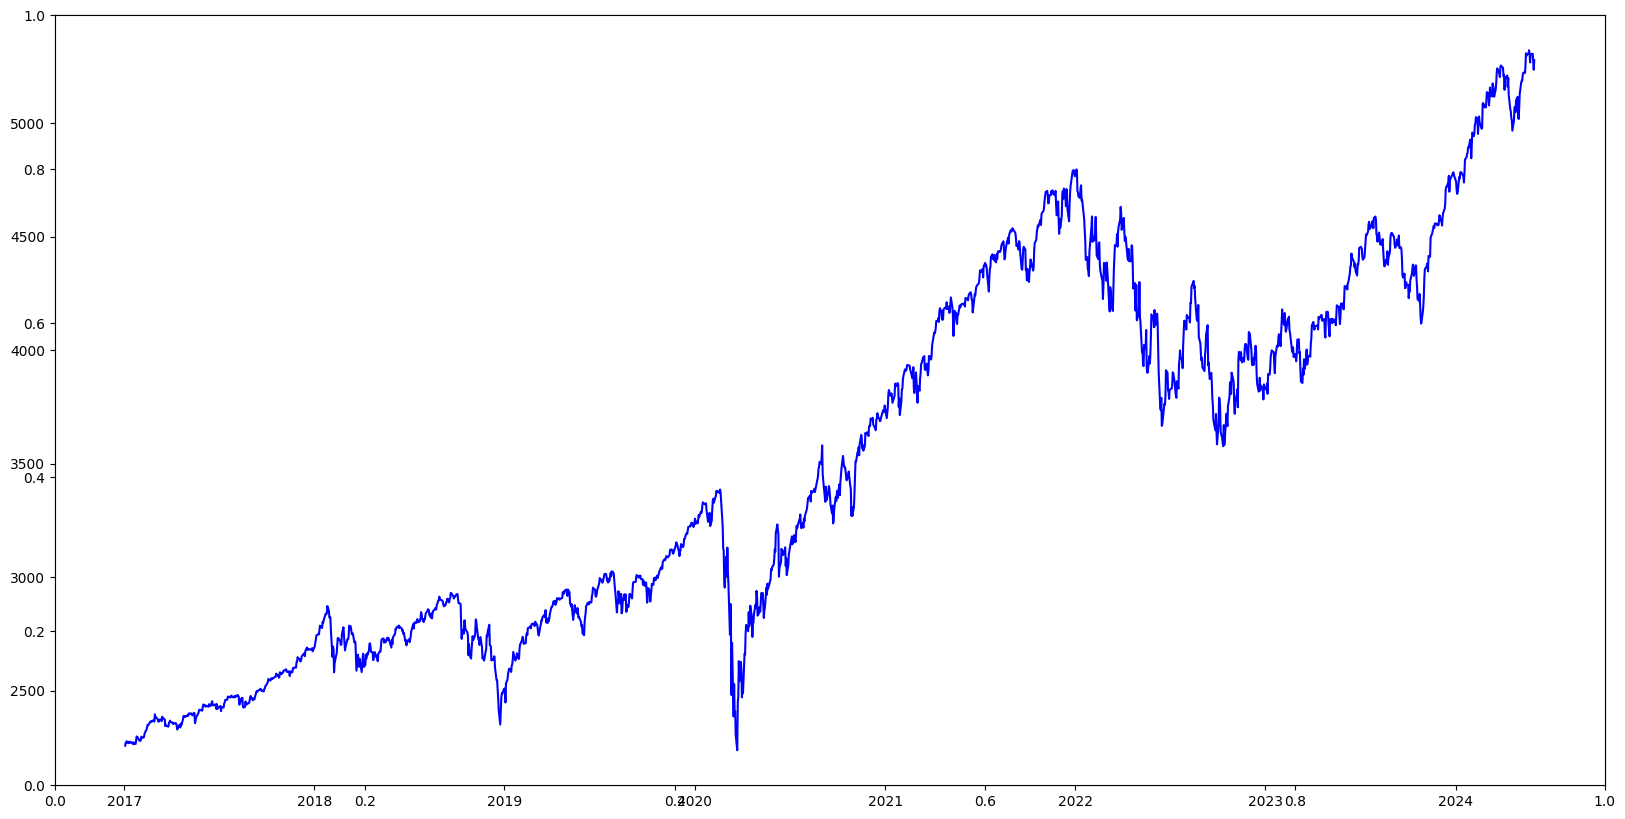

In [28]:
events = {
    "2017-01-20": "Donald Trump Inaugurated as President",
    "2017-12-22": "U.S. Tax Cuts and Jobs Act Passed",
    "2018-02-05": "Dow Jones Records Largest Single-Day Point Drop",
    "2018-10-10": "Stock Market Plunge Due to Interest Rate Hike Concerns",
    "2019-01-25": "Partial Trade Agreement Between U.S. and China",
    "2019-12-12": "Phase One Trade Deal Between U.S. and China Signed",
    "2020-03-16": "Stock Market Crash Due to COVID-19 Pandemic",
    "2020-03-23": "Federal Reserve Announces Unlimited Quantitative Easing",
    "2020-11-09": "Pfizer Announces COVID-19 Vaccine",
    "2021-01-06": "U.S. Capitol Riot",
    "2021-01-20": "Joe Biden Inaugurated as President",
    "2021-11-26": "Omicron Variant Discovered",
    "2022-03-16": "Federal Reserve Raises Interest Rates",
    "2022-11-10": "October Consumer Price Index (CPI) Lower Than Expected",
    "2023-03-10": "Collapse of Silicon Valley Bank (SVB)"
}

5277.509765625

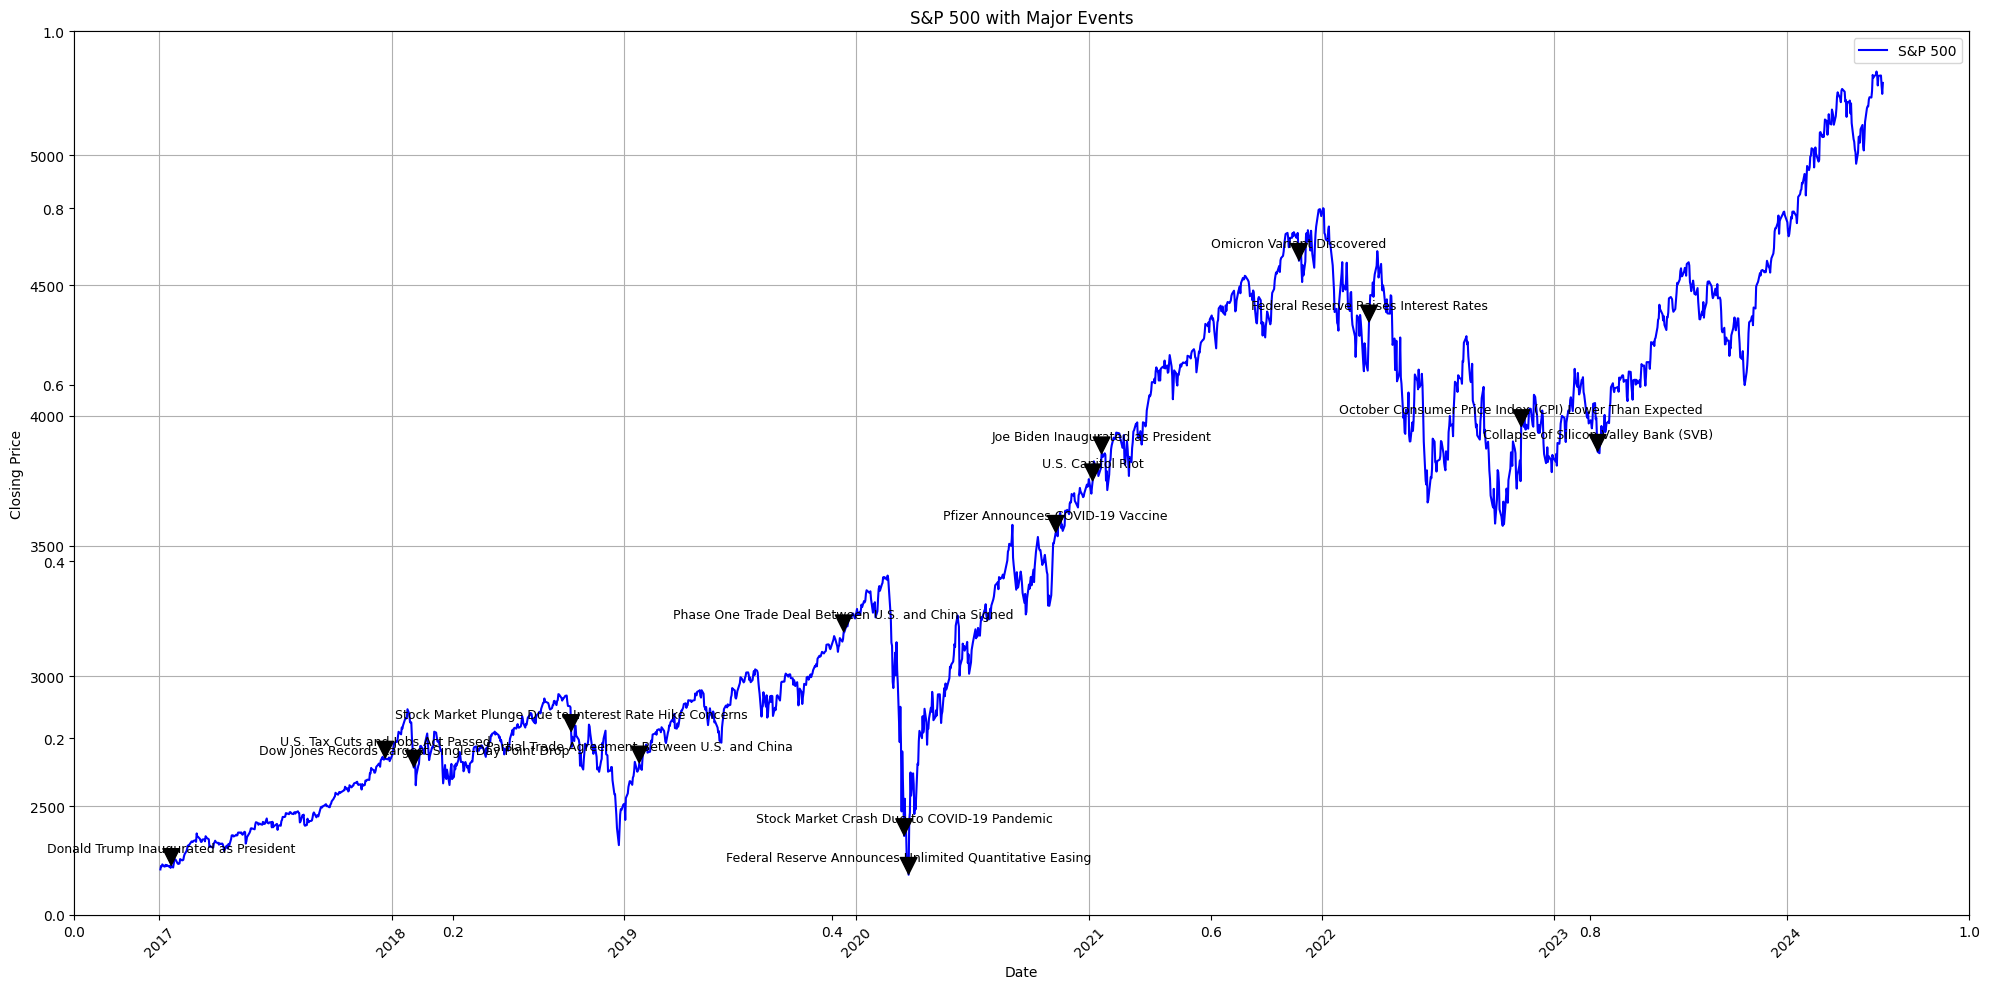

In [51]:

events = {pd.to_datetime(date): desc for date, desc in events.items()}

fig, ax = plt.subplots(figsize=(20, 10))
ax = fig.add_subplot()
ax.plot(data.index, data['Close'], label='S&P 500', color='blue')

for date, event in events.items():
  ax.annotate(event,
              (date, data.loc[date]['Close']),
              textcoords='offset points',
              xytext=(0,10),
              ha='center',
              fontsize=9,
              arrowprops=dict(facecolor='black', shrink=0.05))


ax.set_title('S&P 500 with Major Events')
ax.set_xlabel('Date')
ax.set_ylabel('Closing Price')
ax.legend()
ax.grid(True)

# x축 레이블 회전
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

[*********************100%%**********************]  1 of 1 completed


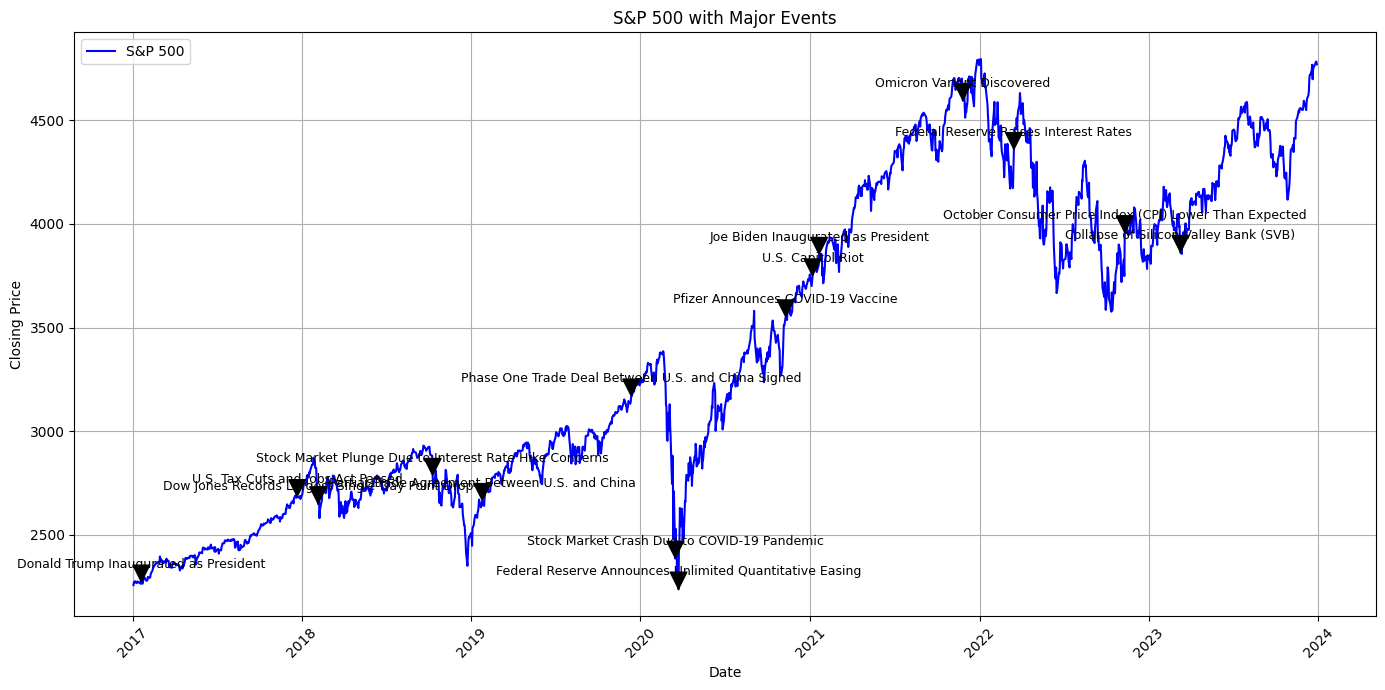